<a href="https://colab.research.google.com/github/silverstar0727/n_body_problem/blob/master/modeling_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 라이브러리 임포트
import scipy as sci

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [ ]:
# 중력상수G
G = 6.67408e-11 # 단위는 [Nm^2/kg^2]

m_nd = 1.989e+30 # 태양 질량 단위는 [kg]
r_nd = 5.326e+12 # 알파 센타우리까지의 거리 단위는 [m]
v_nd = 30000 # 지구의 공전속도 [m/s]
t_nd = 79.91 * 365 * 24 * 3600 * 0.51 # 알파센타우리의 공전 주기 단위는 [s]

# 총 상수
K1 = G * t_nd * m_nd / (r_nd ** 2 * v_nd) # [Ns^2/m]
K2 = v_nd * t_nd / r_nd

In [ ]:
# 직접적인 물체 정의

# 질량 정의
m1=1.1 # 알파센타우리 A
m2=0.907 # 알파센타우리 B

# 초기 위치 벡터 정의
r1=[-0.5,0,0] # [m]
r2=[0.5,0,0] # [m]

# Convert pos vectors to arrays
r1=np.array(r1,dtype="float64")
r2=np.array(r2,dtype="float64")

# 질량 중심
r_com = (m1*r1 + m2*r2) / (m1+m2)

# 초기 속도 벡터 정의
v1=[0.01,0.01,0] # [m/s]
v2=[-0.05,0,-0.1] # [m/s]

#Convert velocity vectors to arrays
v1=np.array(v1,dtype="float64")
v2=np.array(v2,dtype="float64")

# 질량 중심점의 속도
v_com = (m1*v1 + m2*v2) / (m1 + m2)

In [ ]:
#A function defining the equations of motion 
def TwoBodyEquations(w,t,G,m1,m2):
    r1 = w[:3]
    r2 = w[3:6]
    v1 = w[6:9]
    v2 = w[9:12]
    r = np.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    
    # v1,v2,r1,r2의 시간에 대한 미분
    dv1_by_dt = K1*m2*(r2-r1) / r**3
    dv2_by_dt = K1*m1*(r1-r2) / r**3
    dr1_by_dt = K2*v1
    dr2_by_dt = K2*v2
    
    r_derivs = np.concatenate((dr1_by_dt, dr2_by_dt))
    derivs = np.concatenate((r_derivs, dv1_by_dt, dv2_by_dt))

    return derivs

In [ ]:
#Package initial parameters
init_params = np.array([r1, r2, v1, v2]) #create array of initial params
init_params = init_params.flatten() #flatten array to make it 1D
time_span = np.linspace(0, 8, 500) #8 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate
two_body_sol = sci.integrate.odeint(TwoBodyEquations, init_params, time_span,args = (G, m1, m2))

In [ ]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

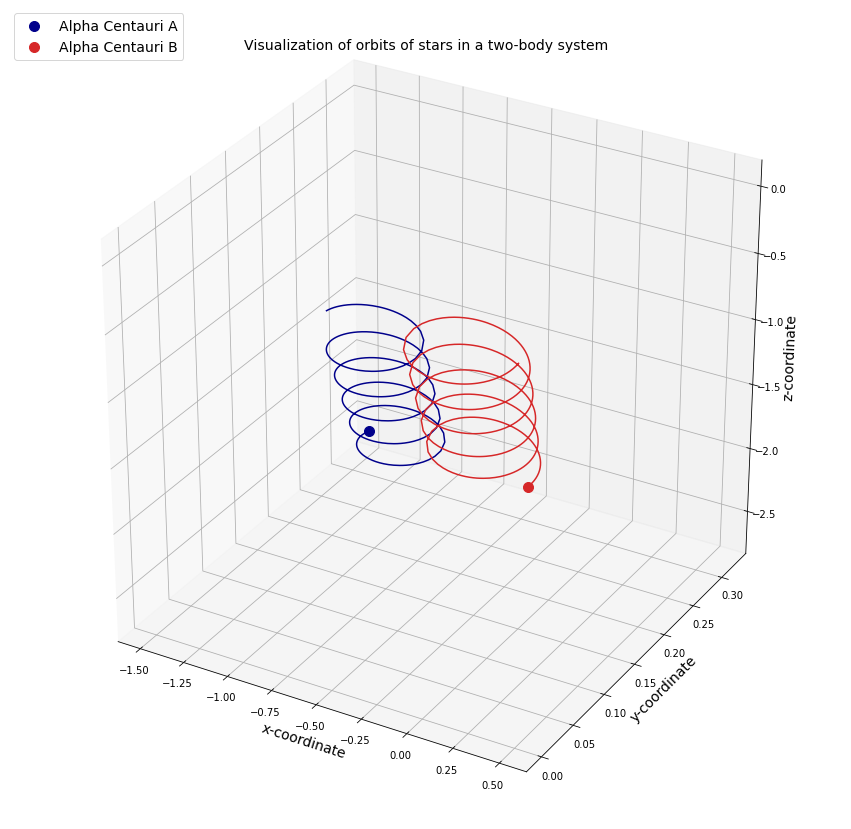

In [ ]:
#Create figure
fig=plt.figure(figsize=(15,15))

#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")

#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [ ]:
#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)

#Find location of Alpha Centauri A w.r.t COM
r1com_sol=r1_sol-rcom_sol

#Find location of Alpha Centauri B w.r.t COM
r2com_sol=r2_sol-rcom_sol

In [ ]:
# Mass of the Third Star
m3=1.0 #Third Star
#Position of the Third Star
r3=[0,1,0] #m
r3=np.array(r3,dtype="float64")

#Velocity of the Third Star
v3=[0,-0.01,0]
v3=np.array(v3,dtype="float64")

In [ ]:
#Update COM formula
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)

#Update velocity of COM formula
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

In [ ]:
def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]
    r12=np.linalg.norm(r2-r1)
    r13=np.linalg.norm(r3-r1)
    r23=np.linalg.norm(r3-r2)
    
    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3
    r12_derivs=np.concatenate((dr1bydt,dr2bydt))
    r_derivs=np.concatenate((r12_derivs,dr3bydt))
    v12_derivs=np.concatenate((dv1bydt,dv2bydt))
    v_derivs=np.concatenate((v12_derivs,dv3bydt))
    derivs=np.concatenate((r_derivs,v_derivs))
    return derivs

In [ ]:
#Package initial parameters
init_params=np.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=np.linspace(0,20,500) #20 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate
three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))

In [ ]:
r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

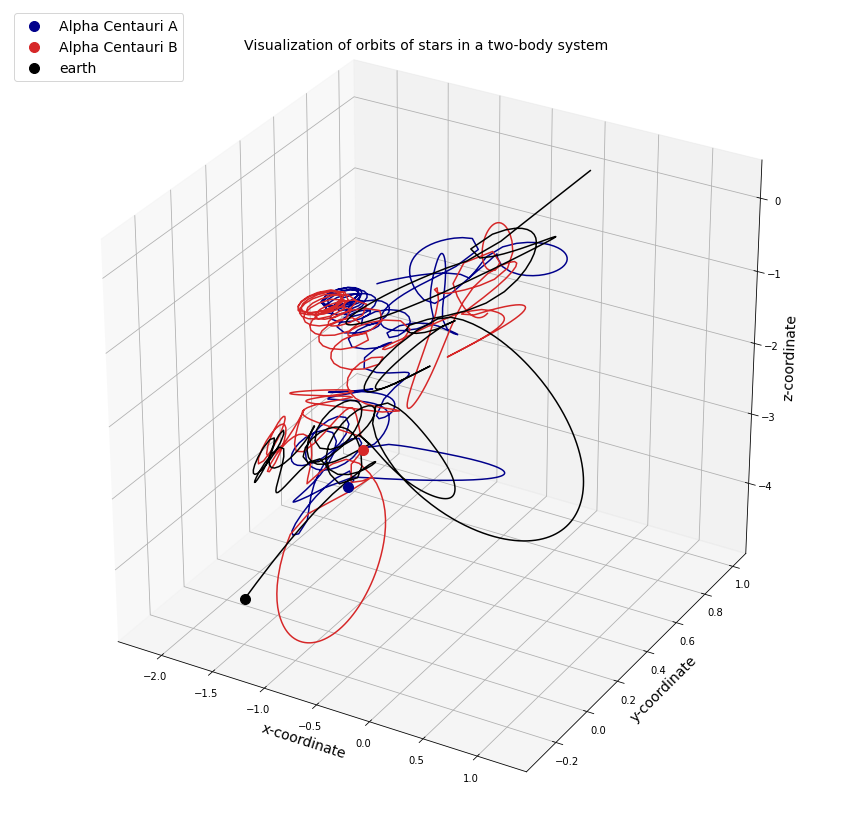

In [ ]:
#Create figure
fig=plt.figure(figsize=(15,15))

#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color='black')

#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color='black',marker='o',s=100,label='earth')

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)